# Cost-Sensitive-Learning
## Misclassification cost as part of training


There are 2 ways in which we can introduce cost into the learning function of the algorithm with Scikit-learn:

Defining the class_weight parameter for those estimators that allow it, when we set the estimator
Passing a sample_weight vector with the weights for every single observation, when we fit the estimator.
With both the class_weight parameter or the sample_weight vector, we indicate that the loss function should be modified to accommodate the class imbalance and the cost attributed to each misclassification.

**parameters**

**class_weight:** can take 'balanced' as argument, in which case it will use the balance ratio as weight. Alternatively, it can take a dictionary with **{class: penalty}**, pairs. In this case, it penalizes mistakes in samples of class[i] with class_weight[i].

So if **class_weight = {0:1, and 1:10}**, misclassification of observations of class 1 are penalized 10 times more than misclassification of observations of class 0.

**sample_weight **is a vector of the same length as y, containing the weight or penalty for each individual observation. In principle, it is more flexible, because it allows us to set weights to the observations and not to the class as a whole. So in this case, for example we could set up higher penalties for fraudulent applications that are more costly (money-wise)than to those fraudulent applications that are of little money.

**Important**

If you use both class_weight and sample_weight, the final penalty will be the combination of the 2, so be very careful

In [1]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import matplotlib.gridspec as gridspec
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
# Preparation  
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer, StandardScaler,Normalizer,RobustScaler,MaxAbsScaler,MinMaxScaler,QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
# Import StandardScaler from scikit-learn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer,IterativeImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline,FeatureUnion
from sklearn.manifold import TSNE
# Import train_test_split()
# Metrics
from sklearn.metrics import roc_auc_score, average_precision_score,recall_score
from sklearn.metrics import make_scorer,mean_absolute_error
from sklearn.metrics import mean_squared_error,classification_report,f1_score
from sklearn.metrics import roc_curve,confusion_matrix
from yellowbrick.classifier import (
    ClassificationReport,
    DiscriminationThreshold,
)
from datetime import datetime, date
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.linear_model import LogisticRegression

#import tensorflow as tf 
#from tensorflow.keras import layers
#from tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.keras.callbacks import LearningRateScheduler
#import smogn
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone,ClassifierMixin
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
# For training random forest model
import lightgbm as lgb
from scipy import sparse
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# Model selection
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif,chi2
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif,VarianceThreshold

from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
# Imbalanced data 
from imblearn.datasets import fetch_datasets
# to correctly set up the cross-validation
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import (
    RandomUnderSampler,
    CondensedNearestNeighbour,
    TomekLinks,
    OneSidedSelection,
    EditedNearestNeighbours,
    RepeatedEditedNearestNeighbours,
    AllKNN,
    NeighbourhoodCleaningRule,
    NearMiss,
    InstanceHardnessThreshold
)
from imblearn.over_sampling import (
    RandomOverSampler,
    SMOTE,
    ADASYN,
    BorderlineSMOTE,
    SVMSMOTE,
)


from lightgbm import LGBMClassifier
import lightgbm as lgbm
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from xgboost import XGBClassifier,XGBRegressor
from sklearn import set_config
from itertools import combinations
# Cluster :
from sklearn.cluster import MiniBatchKMeans
#from yellowbrick.cluster import KElbowVisualizer
#import smong 
import category_encoders as ce
import warnings
#import optuna 
from joblib import Parallel, delayed
import joblib 
from sklearn import set_config
from typing import List, Optional, Union
set_config(display='diagram')
warnings.filterwarnings('ignore')


# Load the data

In [2]:
%%time 
train = pd.read_csv('../input/GiveMeSomeCredit/cs-training.csv')
test = pd.read_csv('../input/GiveMeSomeCredit/cs-test.csv')
train.head(3)

CPU times: user 199 ms, sys: 66.3 ms, total: 266 ms
Wall time: 383 ms


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


# 1-Preprocessing

## Convert Dtypes :

In [3]:
# Convert Dtypes :
train[train.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns] = train[train.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object','category']).columns] = train.select_dtypes(['object','category']).apply(lambda x: x.astype('category'))
# Convert Dtypes :
test[test.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns] = test[test.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns].apply(pd.to_numeric)
test[test.select_dtypes(['object','category']).columns] = test.select_dtypes(['object','category']).apply(lambda x: x.astype('category'))

# Imbalanced target



In [4]:
train.SeriousDlqin2yrs.value_counts() / len(train)

0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64

In [5]:
train.SeriousDlqin2yrs.value_counts() 

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

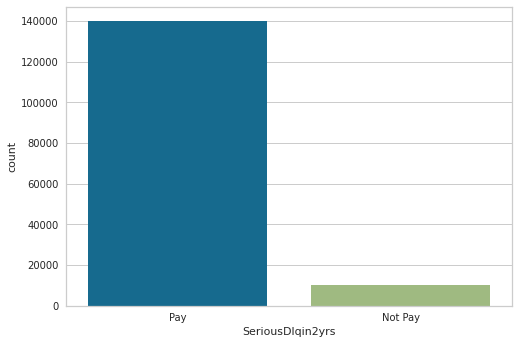

In [6]:
# visualize the target variable
g = sns.countplot(train['SeriousDlqin2yrs'])
g.set_xticklabels(['Pay','Not Pay'])
plt.show()

## Reduce Memory

In [7]:
# Author : https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        name =df[col].dtype.name 
        
        if col_type != object and col_type.name != 'category':
        #if name != "category":    
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df
train= reduce_mem_usage(train)
test= reduce_mem_usage(test)

Memory usage of dataframe is 13.73 MB
Memory usage after optimization is: 3.29 MB
Decreased by 76.0%
Memory usage of dataframe is 9.29 MB
Memory usage after optimization is: 2.90 MB
Decreased by 68.7%


## X and Y

In [8]:
# Cardinality : 
# - RevolvingUtilizationOfUnsecuredLines :125728, high Outlier
# - DebtRatio :114194 , high Outlier 
# deal with outlier + bin 
PERCENTAGE = ["RevolvingUtilizationOfUnsecuredLines", "DebtRatio"]
# MonthlyIncome:13594 , high outlier +bin 
REAL= ["MonthlyIncome"]
# Can be considred as cat 
NUMERIC_DISCRET_low = ["NumberOfDependents",
                       "NumberOfTime60-89DaysPastDueNotWorse",
                       "NumberRealEstateLoansOrLines",
                       "NumberOfTimes90DaysLate",
                       "NumberOfOpenCreditLinesAndLoans",
                       "NumberOfTime30-59DaysPastDueNotWorse",
                       "age"]
Late_Pay_Cols = ['NumberOfTime30-59DaysPastDueNotWorse',
                 'NumberOfTimes90DaysLate',
                 'NumberOfTime60-89DaysPastDueNotWorse']
TARGET = ["SeriousDlqin2yrs"]

#also change the type for TARGET to categorical
#df[TARGET] = df[TARGET].astype('category')

In [9]:
y = train['SeriousDlqin2yrs']

## Imput before Descritaziation : 

### IterativeImputer


In [10]:
%%time 
param =  {   "verbosity": 0,
            #"objective": "binary:logistic",
            #"eval_metric": "auc",
            'random_state': 42,
            # regression
            'objective':'reg:squarederror', 
             'eval_metric': 'mae',
            #early_stopping_rounds=100 ,
            'gpu_id':0, 
            'predictor':"gpu_predictor",
            # use exact for small dataset.
            #"tree_method": "exact",
            # big data :
             'tree_method': 'gpu_hist',
            # defines booster, gblinear for linear functions.
             'booster': 'gbtree', 
            'lambda': 8.544792472633987e-07,
            'alpha': 0.31141671752487043,
            'subsample': 0.8779467596981366, 
            'colsample_bytree': 0.9759532762677546,
            'learning_rate': 0.008686087328805853, 
            'n_estimators': 6988,
            'max_depth': 9,
            'min_child_weight': 2, 
            'eta': 3.7603213457541647e-06,
            'gamma': 2.1478058456847449e-07,
            'grow_policy': 'lossguide'}
                

#model_xgb = XGBRegressor(
       #objective="mae",
 #   **xgb_params2)

numeric_transformer1 = Pipeline(
                            steps=[
                            ('imputer', SimpleImputer(strategy='median'
                                                      ,add_indicator=True)),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                           # ('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )
numeric_transformer2 = Pipeline(
                            steps=[
                            #('imputer', SimpleImputer(strategy='median'
                             #                         ,add_indicator=True)),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                           # ('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )

pipe_xgbr1 = Pipeline(
                    steps=[
                        ('preprocessor', numeric_transformer1),
                        ('classifier', XGBRegressor(
                      #objective="mae",
                       **param))
                    ]
                )
pipe_xgbr2 = Pipeline(
                    steps=[
                        ('preprocessor', numeric_transformer2),
                        ('classifier', XGBRegressor(
                      #objective="mae",
                       **param))
                    ]
                )

CPU times: user 974 µs, sys: 0 ns, total: 974 µs
Wall time: 807 µs


In [11]:
%%time 
train=train.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis=1)
test=test.drop(['Unnamed: 0','SeriousDlqin2yrs'], axis=1)
train_final= pd.concat( [train, test], axis=0) 
#testdf_income= train_final[train_final['MonthlyIncome'].isnull()==True]
traindf_income = train_final[train_final['MonthlyIncome'].isnull()==False]
y_income = traindf_income['MonthlyIncome']
X_income=traindf_income.drop(["MonthlyIncome"],axis=1)
pipe_xgbr1.fit(X_income, y_income)
train_income_missing=train[train['MonthlyIncome'].isnull()==True].drop(["MonthlyIncome"],axis=1)
test_income_missing=test[test['MonthlyIncome'].isnull()==True].drop(["MonthlyIncome"],axis=1)
train_predicted = pipe_xgbr1.predict(train_income_missing)
test_predicted = pipe_xgbr1.predict(test_income_missing)
train.loc[(train.MonthlyIncome.isnull()), 'MonthlyIncome'] = train_predicted
test.loc[(test.MonthlyIncome.isnull()), 'MonthlyIncome'] = test_predicted

CPU times: user 2min 17s, sys: 2.56 s, total: 2min 20s
Wall time: 2min 21s


In [12]:
%%time 
traindf_NumberOfDependents = train_final[train_final['NumberOfDependents'].isnull()==False]
y_NumberOfDependents = traindf_NumberOfDependents['NumberOfDependents']
X_NumberOfDependents=traindf_NumberOfDependents.drop(["NumberOfDependents"],axis=1)
pipe_xgbr2.fit(X_NumberOfDependents, y_NumberOfDependents)
train_NumberOfDependents_missing=train[train['NumberOfDependents'].isnull()==True].drop(["NumberOfDependents"],axis=1)
test_NumberOfDependents_missing=test[test['NumberOfDependents'].isnull()==True].drop(["NumberOfDependents"],axis=1)
train_predicted = pipe_xgbr2.predict(train_NumberOfDependents_missing)
test_predicted = pipe_xgbr2.predict(test_NumberOfDependents_missing)
train.loc[(train.NumberOfDependents.isnull()), 'NumberOfDependents'] = train_predicted
test.loc[(test.NumberOfDependents.isnull()), 'NumberOfDependents'] = test_predicted

CPU times: user 2min 45s, sys: 970 ms, total: 2min 46s
Wall time: 2min 46s


In [13]:
# Add bin data 
# initializing append_str
append_str = 'cat_'
# Append suffix / prefix to strings in list
num_features1=["RevolvingUtilizationOfUnsecuredLines", "DebtRatio","MonthlyIncome"]
num_features2=["NumberOfDependents",
                       "NumberOfTime60-89DaysPastDueNotWorse",
                       "NumberRealEstateLoansOrLines",
                       "NumberOfTimes90DaysLate",
                       "NumberOfOpenCreditLinesAndLoans",
                       "NumberOfTime30-59DaysPastDueNotWorse",
                       "age"]
cat_features1 = [append_str + sub for sub in num_features1]
cat_features2 = [append_str + sub for sub in num_features2]

# create the discretizer object with strategy quantile and 1000 bins
discretizer1 = KBinsDiscretizer(n_bins=40, encode='ordinal',strategy='quantile')
discretizer2 = KBinsDiscretizer(n_bins=4, encode='ordinal',strategy='quantile')

pipeline1 = Pipeline([
        ('imputer', SimpleImputer( strategy='median')),
        ('bin', discretizer1)
    ])
# fit the discretizer to the train set
pipeline1.fit(train.loc[:,num_features1])
# apply the discretisation
train_cat1 = pipeline1.transform(train.loc[:,num_features1])
test_cat1 = pipeline1.transform(test.loc[:,num_features1])
train_df1=pd.DataFrame(train_cat1,columns=cat_features1).astype('category')
test_df1=pd.DataFrame(test_cat1,columns=cat_features1).astype('category')
train_final1= pd.concat( [train.loc[:,num_features1], train_df1], axis=1) 
test_final1= pd.concat( [test.loc[:,num_features1], test_df1], axis=1) 

pipeline2 = Pipeline([
        ('imputer', SimpleImputer( strategy='median')),
        ('bin', discretizer2)
    ])
# fit the discretizer to the train set
pipeline2.fit(train.loc[:,num_features2])
# apply the discretisation
train_cat2 = pipeline2.transform(train.loc[:,num_features2])
test_cat2 = pipeline2.transform(test.loc[:,num_features2])
train_df2=pd.DataFrame(train_cat2,columns=cat_features2).astype('category')
test_df2=pd.DataFrame(test_cat2,columns=cat_features2).astype('category')
train_final2= pd.concat( [train.loc[:,num_features2], train_df2], axis=1) 
test_final2= pd.concat( [test.loc[:,num_features2], test_df2], axis=1) 

In [14]:
train_final= pd.concat( [train_final1, train_final2], axis=1) 
test_final= pd.concat( [test_final1, test_final2], axis=1) 

## Final X and y

In [15]:
# Pour le train test
target= "SeriousDlqin2yrs"
X = train_final# axis=1
X_test_final =test_final# axis=1

In [16]:
X_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 20 columns):
 #   Column                                    Non-Null Count   Dtype   
---  ------                                    --------------   -----   
 0   RevolvingUtilizationOfUnsecuredLines      101503 non-null  float16 
 1   DebtRatio                                 101503 non-null  float32 
 2   MonthlyIncome                             101503 non-null  float32 
 3   cat_RevolvingUtilizationOfUnsecuredLines  101503 non-null  category
 4   cat_DebtRatio                             101503 non-null  category
 5   cat_MonthlyIncome                         101503 non-null  category
 6   NumberOfDependents                        101503 non-null  float16 
 7   NumberOfTime60-89DaysPastDueNotWorse      101503 non-null  int8    
 8   NumberRealEstateLoansOrLines              101503 non-null  int8    
 9   NumberOfTimes90DaysLate                   101503 non-null  int8    
 10  NumberOf

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column                                    Non-Null Count   Dtype   
---  ------                                    --------------   -----   
 0   RevolvingUtilizationOfUnsecuredLines      150000 non-null  float16 
 1   DebtRatio                                 150000 non-null  float32 
 2   MonthlyIncome                             150000 non-null  float32 
 3   cat_RevolvingUtilizationOfUnsecuredLines  150000 non-null  category
 4   cat_DebtRatio                             150000 non-null  category
 5   cat_MonthlyIncome                         150000 non-null  category
 6   NumberOfDependents                        150000 non-null  float16 
 7   NumberOfTime60-89DaysPastDueNotWorse      150000 non-null  int8    
 8   NumberRealEstateLoansOrLines              150000 non-null  int8    
 9   NumberOfTimes90DaysLate                   150000 non-null  int8    
 10  NumberOf

In [18]:
del train
del test 
del train_final
del test_final

In [19]:
# select non-numeric columns
cat_columns = X.select_dtypes(exclude=['int64','int16','float16','float32','float64','int8']).columns
cat_columns

Index(['cat_RevolvingUtilizationOfUnsecuredLines', 'cat_DebtRatio',
       'cat_MonthlyIncome', 'cat_NumberOfDependents',
       'cat_NumberOfTime60-89DaysPastDueNotWorse',
       'cat_NumberRealEstateLoansOrLines', 'cat_NumberOfTimes90DaysLate',
       'cat_NumberOfOpenCreditLinesAndLoans',
       'cat_NumberOfTime30-59DaysPastDueNotWorse', 'cat_age'],
      dtype='object')

### Num Features



In [20]:
# select the float columns
num_columns = X.select_dtypes(include=['int64','int16','float16','float32','float64','int8']).columns
num_columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome',
       'NumberOfDependents', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberRealEstateLoansOrLines', 'NumberOfTimes90DaysLate',
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse', 'age'],
      dtype='object')

# FE

In [21]:
class MiniKmeansTransformerEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, num_clusters = 11, encoder=ce.woe.WOEEncoder()):
        self.num_clusters = num_clusters
        self.encoder= encoder
        if self.num_clusters > 0:
            self.kmeans = MiniBatchKMeans(n_clusters=self.num_clusters, random_state=0)
    
    def fit(self, X, y=None):
        if self.num_clusters > 0:
            self.kmeans.fit(X)
            preds=self.kmeans.predict(X)
            preds=pd.DataFrame(preds, columns=['kmeans']).astype('category')
            self.encoder.fit(preds,y)
        return self
    
    def transform(self, X, y=None):
        pred_classes = self.kmeans.predict(X)
        pred_classes=pd.DataFrame(pred_classes, columns=['kmeans']).astype('category')
        pred_encoded = self.encoder.transform(pred_classes)
        return np.hstack((X, pred_encoded))
        #return pred_encoded

# Complete Pipe 

1. Features Engineer

1. Kmeans

1. Sparse

1. Poly

1. Scaler/Transformer

1. imput

1. Add bin data 

## Pipe : 


In [22]:
# Cat pipeline
categorical_transformer = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='most_frequent',
                                                  fill_value='missing',
                                                  add_indicator=True)),
                        ('encoder',  ce.woe.WOEEncoder()),#(Numerical Input, Categorical Output)
                        #('sparse_features', SparseInteractions(degree=2)),
                        #('reducedim',  SelectPercentile( mutual_info_classif, percentile=90))

                    ]
                    ) 
#Define vnum pipeline
numeric_transformer = Pipeline(
                            steps=[
                            ('imputer', SimpleImputer(strategy='median'
                                                      ,add_indicator=True)),
                            #('general_features',FeaturesEngineer()),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                            ('kmeans',MiniKmeansTransformerEncoder()),
                            ('polynominal_features', PolynomialFeatures(degree=2)),
                            #('reducedim',  SelectPercentile(f_classif,percentile=90))
                            ]
                            )
# Features union cat + num 
# WOE+PowerTransformer
preprocessor_woe_powertransformer = ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer, num_columns),
               # ('categorical', categorical_transformer, cat_columns)
            ])
#Define vnum pipeline
numeric_transformer_final = Pipeline(
                            steps=[
                            ('imputer', SimpleImputer(strategy='median'
                                                      ,add_indicator=True)),
                            #('general_features',FeaturesEngineer()),
                            ('scaler', PowerTransformer()),#(Numerical Input, Numerical Output)
                            # Create an SelectKBest object to select features with two best ANOVA F-Values
                            #The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different
                            ('kmeans',MiniKmeansTransformerEncoder()),
                            ('polynominal_features', PolynomialFeatures(degree=2)),
                            ('reducedim',  SelectPercentile(f_classif,percentile=95))
                            ]
                            )
# Features union cat + num 
# WOE+PowerTransformer
preprocessor_woe_powertransformer_final = ColumnTransformer(
            transformers=[
                ('numerical', numeric_transformer_final, num_columns),
               # ('categorical', categorical_transformer, cat_columns)
            ])

In [23]:
lgbm_param2={'learning_rate': 0.0018069834369607075,
                                 'max_depth': 8,
                                 #'max_features': 4,
                                 'min_samples_leaf': 47,
                                 #'min_samples_split': 389,
                                 'subsample': 0.8573598985000007,
                                 #'n_iter_no_change': 300,
                                 'n_estimators': 5000,
                                 'verbose': -1,
                                 'random_state': 42,
                                 'metric': 'auc',
                                "device_type" : "gpu",
                                'boosting_type': 'gbdt',
                                #'tree_method': "gpu_hist"
                               }

model_lgbm2 = lgbm.LGBMClassifier(**lgbm_param2,
                              # use it  only on gpu
                            # rsm=np.nan
                              #cat_features=cat_features
                             )
pipe1_model_lgbm_woe_powertransformer2 = Pipeline(
    steps=[
        ('preprocessor', preprocessor_woe_powertransformer),
         ('reducedim',  SelectPercentile( f_classif, percentile=95)),
        # ('dim_red', SelectKBest(f_regression, k=20)),
        #('Sparseinteractions', SparseInteractions(degree=2)),
         #('PolynomialFeatures', PolynomialFeatures(degree=2)),
        #('PCAreducer', PCA(n_components=0.8)),
        ('classifier',model_lgbm2)
    ]
)
pipe1_model_lgbm_woe_powertransformer2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer()),
                                                                  ('kmeans',
                                                                   MiniKmeansTransformerEncoder()),
                                                                  ('polynominal_features',
                                                                   PolynomialFeatures())]),
                                                  Index(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome'...
       'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTime30-59DaysPastDueNotWorse', 'age'],
      dtype='object'))])),
                ('reducedim', SelectPercentile(percentile=95)),
                ('classifier',
                 LGBMClassifier(device_type='gpu',
                                learning_rate=0.0018069834369607075,
                                max_depth=8, metric='auc', min_samples_leaf=47,
                                n_estimators=5000, random_state=42,
                                subsample=0.8573598985000007, verbose=-1))])

#  Train_Test

In [24]:
###############################################################################
#                                  Get data                                 #
###############################################################################
X_train,X_test, y_train,  y_test = train_test_split(X, y,stratify=y, 
                                                       test_size=0.25,
                                                        random_state=42,
                                                        shuffle=True)

In [25]:
preprocessor_woe_powertransformer_final.fit(X_train,y_train)
X_train_pre = preprocessor_woe_powertransformer_final.transform(X_train)
X_test_pre = preprocessor_woe_powertransformer_final.transform(X_test)
#del x_final
#del x_test_final

# Cost

In [26]:
# NOTE, THIS CELL WILL NOT WORK WITH SKLEARN VERSION > 0.24
# JUST COMMENT IT OUT, OR DELETE THIS CELL TO CARRY ON WITH THE NOTEBOOK.

# Let's find out which classifiers from sklearn support class_weight
# as part of the __init__ method, that is, when we set the m up

from sklearn.utils.testing import all_estimators

estimators = all_estimators(type_filter='classifier')

for name, class_ in estimators:
    try:
        if hasattr(class_(), 'class_weight'):
            print(name)
    except:
        pass

DecisionTreeClassifier
ExtraTreeClassifier
ExtraTreesClassifier
LinearSVC
LogisticRegression
LogisticRegressionCV
NuSVC
PassiveAggressiveClassifier
Perceptron
RandomForestClassifier
RidgeClassifier
RidgeClassifierCV
SGDClassifier
SVC


Not all classifiers support class_weight. For those which don't, like GradientBoostingClassifier, we can still use sample_weight when we fit the estimator.
# Using class_weight 
## LR /lgbm2

In [27]:
# Logistic Regression with class_weight
# we initialize the cost / weights when we set up the transformer
def run_Logit1(X_train, X_test, y_train, y_test, class_weight):
    
    # weights introduced here
    logit = lgbm.LGBMClassifier(**lgbm_param2,
                              # use it  only on gpu
                            # rsm=np.nan
                              #cat_features=cat_features
                                class_weight=class_weight # weights / cost
                             )
    
    logit.fit(X_train, y_train)

    print('Train set')
    pred = logit.predict_proba(X_train)
    print(
        'LGBM roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = logit.predict_proba(X_test)
    print(
        'LGBM roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))
def run_Logit2(X_train, X_test, y_train, y_test, class_weight):
    
    # weights introduced here
    logit = LogisticRegression(
        penalty='l2',
        solver='newton-cg',
        random_state=0,
        max_iter=10,
        n_jobs=4,
       class_weight=class_weight # weights / cost
    )
    
    logit.fit(X_train, y_train)

    print('Train set')
    pred = logit.predict_proba(X_train)
    print(
        'Logistic regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = logit.predict_proba(X_test)
    print(
        'Logistic regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))    

## lgbm

In [28]:
# evaluate performance of algorithm built
# using imbalanced dataset
run_Logit1(X_train_pre,
          X_test_pre,
          y_train,
          y_test,
          class_weight=None)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
Train set
LGBM roc-auc: 0.8978676276484274
Test set
LGBM roc-auc: 0.8661449077053045


In [29]:
# evaluate performance of algorithm built
# using imbalanced dataset
run_Logit2(X_train_pre,
          X_test_pre,
          y_train,
          y_test,
          class_weight=None)

Train set
Logistic regression roc-auc: 0.8600715713834044
Test set
Logistic regression roc-auc: 0.8626891334375826


# Balanced : 
By default, the value of class_weight=None, i.e. both the classes have been given equal weights. Other than that, we can either give it as ‘balanced’ or we can pass a dictionary that contains manual weights for both the classes.

When the class_weights = ‘balanced’, the model automatically assigns the class weights inversely proportional to their respective frequencies.

To be more precise, the formula to calculate this is:

wj=n_samples / (n_classes * n_samplesj)

Here,

wj is the weight for each class(j signifies the class)
n_samplesis the total number of samples or rows in the dataset
n_classesis the total number of unique classes in the target
n_samplesjis the total number of rows of the respective class
For our heart stroke example:

n_samples=  43400,  n_classes= 2(0&1), n_sample0= 42617, n_samples1= 783

Weights for class 0:

w0=  43400/(2*42617) = 0.509

Weights for class 1:

w1= 43400/(2*783) = 27.713

I hope this makes things more clear that how class_weight = ‘balanced’ helps us to in giving higher weights to the minority class and lower weights to the majority class.

Although passing value as ‘balanced’ gives good results in most cases but sometimes for extreme class imbalance, we can try giving weights manually. 

In [30]:
# evaluate performance of algorithm built
# cost estimated as imbalance ratio
# 'balanced' indicates that we want same amount of 
# each observation, thus, imbalance ratio
run_Logit1(X_train_pre,
          X_test_pre,
          y_train,
          y_test,
          class_weight='balanced')

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
Train set
LGBM roc-auc: 0.9018389571671199
Test set
LGBM roc-auc: 0.8648791850806848


In [31]:
run_Logit2(X_train_pre,
          X_test_pre,
          y_train,
          y_test,
          class_weight='balanced')

Train set
Logistic regression roc-auc: 0.8608867393181274
Test set
Logistic regression roc-auc: 0.8633146881729719


In [32]:
# evaluate performance of algorithm built
# cost estimated as imbalance ratio

# alternatively, we can pass a different cost
# in a dictionary, if we know it already

run_Logit1(X_train_pre,
          X_test_pre,
          y_train,
          y_test,
          class_weight={0:1, 1:10})

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
Train set
LGBM roc-auc: 0.9014341871856036
Test set
LGBM roc-auc: 0.8653286692722743


In [33]:
run_Logit2(X_train_pre,
          X_test_pre,
          y_train,
          y_test,
          class_weight={0:1, 1:10})

Train set
Logistic regression roc-auc: 0.8605597710100809
Test set
Logistic regression roc-auc: 0.863189903356366


# Using sample_weight

All the documentation says that is should be:

**scale_pos_weight = count(negative examples)/count(Positive examples)**

In practice, that works pretty well, but if your dataset is extremely unbalanced I'd recommend using something more conservative like:

**scale_pos_weight = sqrt(count(negative examples)/count(Positive examples))**

credit : 
https://www.kaggle.com/bannourchaker/6-datacentricapprochfinal

**Weight 1:**

In [34]:
scale_pos_weight1 = 139974/(10026)
scale_pos_weight1

13.961101137043686

In [35]:
scale_pos_weight2_smooth = np.sqrt(139974/(10026)) 
scale_pos_weight2_smooth 

3.7364556918346676

In [36]:

# Logistic Regression + sample_weight

# we pass the weights / cost, when we train the algorithm

def run_Logit3(X_train, X_test, y_train, y_test, sample_weight):
    
    logit = LogisticRegression(
        penalty='l2',
        solver='newton-cg',
        random_state=0,
        max_iter=10,
        n_jobs=4,
    )
    
    # costs are passed here
    logit.fit(X_train, y_train, sample_weight=sample_weight)

    print('Train set')
    pred = logit.predict_proba(X_train)
    print(
        'lR roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = logit.predict_proba(X_test)
    print(
        'LR roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))
def run_Logit4(X_train, X_test, y_train, y_test, sample_weight):

    logit = lgbm.LGBMClassifier(**lgbm_param2,
                              # use it  only on gpu
                            # rsm=np.nan
                              #cat_features=cat_features
                            #    class_weight=class_weight # weights / cost
                             )
    

    # costs are passed here
    logit.fit(X_train, y_train, sample_weight=sample_weight)

    print('Train set')
    pred = logit.predict_proba(X_train)
    print(
        'LGBM roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = logit.predict_proba(X_test)
    print(
        'LGBM roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

In [37]:
# evaluate performance of algorithm built
# using imbalanced dataset

run_Logit3(X_train_pre,
          X_test_pre,
          y_train,
          y_test,
          sample_weight=None)

Train set
lR roc-auc: 0.8600715713834044
Test set
LR roc-auc: 0.8626891334375826


In [38]:
run_Logit4(X_train_pre,
          X_test_pre,
          y_train,
          y_test,
          sample_weight=None)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47


/opt/conda/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


Train set
LGBM roc-auc: 0.897707804272749
Test set
LGBM roc-auc: 0.8662377750676765


In [39]:
run_Logit3(X_train_pre,
          X_test_pre,
          y_train,
          y_test,
          sample_weight=np.where(y_train==1,4,1))

Train set
lR roc-auc: 0.8606866125462601
Test set
LR roc-auc: 0.8632191866798644


In [40]:
run_Logit4(X_train_pre,
          X_test_pre,
          y_train,
          y_test,
          sample_weight=np.where(y_train==1,4,1))

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47
Train set
LGBM roc-auc: 0.8994740835893767
Test set
LGBM roc-auc: 0.866644702653621


In [41]:
run_Logit3(X_train_pre,
          X_test_pre,
          y_train,
          y_test,
         sample_weight=np.where(y_train==1,14,1))

Train set
lR roc-auc: 0.8611743472920881
Test set
LR roc-auc: 0.863419916564422


In [42]:
run_Logit4(X_train_pre,
          X_test_pre,
          y_train,
          y_test,
          sample_weight=np.where(y_train==1,14,1))

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47


/opt/conda/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


Train set
LGBM roc-auc: 0.9020960464100556
Test set
LGBM roc-auc: 0.8648897501115344


In [43]:
run_Logit4(X_train_pre,
          X_test_pre,
          y_train,
          y_test,
          sample_weight=np.where(y_train==1,50,1))

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=47. Current value: min_data_in_leaf=47


/opt/conda/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


Train set
LGBM roc-auc: 0.9042314702547192
Test set
LGBM roc-auc: 0.8622588920841565


In [44]:
%%time 
#pipe_woe_powertransformer.fit(X,y)
#x_pre = pipe_woe_powertransformer_red.transform(X)
#x_test_final_pre = pipe_woe_powertransformer_red.transform(X_test_final)
#del x_final
#del x_test_final
def plot_roc(y,y_pred):
    from sklearn.metrics import auc
    fpr, tpr, thresholds = roc_curve(y_true=y, y_score=y_pred)
    auc = auc(fpr, tpr)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='Model(area = {:.3f})'.format(auc))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

CPU times: user 0 ns, sys: 5 µs, total: 5 µs
Wall time: 9.06 µs


    %%time 
    # evaluate each strategy on the dataset
    results = list()
    # Setting a 10-fold stratified cross-validation (note: shuffle=True)
    SEED = 42
    FOLDS = 10
    skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=SEED)
    # CV interations
    # Create arrays for the features and the response variable
    roc_auc = list()
    average_precision = list()
    #X1=X.iloc[0:2000,:].copy()
    #y1=y[0:2000].copy()
    oof = np.empty((X.shape[0],))
    #oof_bin = np.empty((X.shape[0],))
    predictions=[]
    mean_auc = 0
    mean_ap=0
    F1 = list()
    Recall=list()
    best_iteration = list()
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):    
        X_train, y_train = X.iloc[list(train_idx), :], y.iloc[list(train_idx)]
        X_test, y_test = X.iloc[list(test_idx), :],y.iloc[list(test_idx)]
        pipe1_model_lgbm_woe_powertransformer2.fit(X_train,y_train,
                                                      #classifier__verbose=False
                                                      #,verbose=False
                                                     )
        preds = pipe1_model_lgbm_woe_powertransformer2.predict_proba(X_test)[:,1]
        oof[test_idx] = preds
        auc_score= roc_auc_score(y_true=y_test, y_score=preds)
        roc_auc.append(auc_score)
        ap=average_precision_score(y_true=y_test, y_score=preds)
        plot_roc(y_test,preds)
        mean_auc += auc_score / FOLDS
        mean_ap+=ap/FOLDS
        predictions.append(pipe1_model_lgbm_woe_powertransformer2.predict_proba(X_test_final)[:,1]) 
        y_predicted = pipe1_model_lgbm_woe_powertransformer2.predict(X_test)
        recall = recall_score(y_test, y_predicted)
        f1= f1_score(y_test, y_predicted)
        print(f"Fold {fold} | AUC: {auc_score}")
        print(f"Fold {fold} | Avergae_precesion: {ap}")
        print(f"Fold {fold} | recall: {recall}")
        print(f"Fold {fold} | F1: {f1}")
        print('Classification report:\n',classification_report(y_test,y_predicted))
        print('Confusion_matrix:\n',confusion_matrix(y_test,y_predicted))
        roc_auc.append(auc_score)
        F1.append(f1)
        Recall.append(recall)
        #Mean of the predictions
    print('-' * 80)  
    print(f"\nOverall mean AUC score : {mean_auc}")
    print(f"\nOverall mean F1 score : {np.mean(F1)}")
    print(f"\nOverall mean average precision score : {mean_ap}")
    print(f"\nOverall mean recall score : {np.mean(Recall)}")

# Prepare data + undersample in all data

In [45]:
%%time 
#pipe_woe_powertransformer.fit(X,y)
#x_pre = pipe_woe_powertransformer_red.transform(X)
#x_test_final_pre = pipe_woe_powertransformer_red.transform(X_test_final)
#model = make_pipeline(
 #           scaler,
  #          undersampler,
   #         model_lgbm2,
    #    )
#rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
#x_rus, y_rus = rus.fit_resample(x, y)

#print('original dataset shape:', Counter(y))
#print('Resample dataset shape', Counter(y_rus))
#del x_final
#del x_test_final

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.44 µs


In [46]:
#predictions.shape

In [47]:
#predictions

In [48]:
#predictions = np.mean(np.column_stack(predictions), axis=1)

    # Save the predictions to a CSV file
    sub = pd.read_csv('../input/GiveMeSomeCredit/sampleEntry.csv')
    sub['Probability']=predictions
    sub.to_csv('pipe1_model_lgbm_woe_powertransformer2_simple.csv', index=False)
    sub

# Conclusion: 

## Advantages and Disadvantage of over-sampling

**Advantages**

Unlike under-sampling, this method leads to no information loss.
Outperforms under sampling

**Disadvantages**

It increases the likelihood of overfitting since it replicates the minority class events.

credit: 

**Imbalanced:**

https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/

https://www.kdnuggets.com/2021/09/imbalanced-classification-without-re-balancing-data.html?fbclid=IwAR0ZS0t-obo3EHV6WLpdd8Tj-ggmHYF5eucmYT_h1khnlQ0uaQBz2PbAvW4

https://github.com/dataprofessor/machine-learning-for-imbalanced-data/blob/main/How_to_build_machine_learning_models_for_imbalanced_datasets.ipynb

https://elitedatascience.com/imbalanced-classes

https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18

https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/

https://github.com/DeepSparkChaker/machine-learning-imbalanced-data/tree/master/Section-04-Undersampling

https://github.com/DeepSparkChaker/machine-learning-imbalanced-data/blob/master/Section-04-Undersampling/04-12-Under-sampling-method-comparison-Precision-cross-val.ipynb

https://github.com/DeepSparkChaker/machine-learning-imbalanced-data/blob/master/Section-05-Oversampling/05-11-Over-sampling-with-cross-validation.ipynb

https://www.kaggle.com/shahules/tackling-class-imbalance#3

**stacking:**

https://towardsdatascience.com/stacking-classifiers-for-higher-predictive-performance-566f963e4840

https://www.dataquest.io/blog/introduction-to-ensembles/

https://scikit-learn.org/stable/modules/ensemble.html

https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/


https://mlfromscratch.com/model-stacking-explained/#/

http://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/

http://rasbt.github.io/mlxtend/user_guide/classifier/StackingCVClassifier/


https://www.kaggle.com/bannourchaker/7ensembling-stacking-averaging-scratchvssklearn/edit/run/73916270

https://www.kaggle.com/bannourchaker/averagingmodels

https://mlfromscratch.com/model-stacking-explained/#/

https://neptune.ai/blog/ensemble-learning-guide

https://www.analyticsvidhya.com/blog/2021/08/ensemble-stacking-for-machine-learning-and-deep-learning/

https://www.kaggle.com/prashant111/adaboost-classifier-tutorial

https://www.kaggle.com/bannourchaker/stacking/edit/run/75840835

https://www.kaggle.com/bannourchaker/8-ensembling-blending-scratchvsoop

**Bagging:**

https://vitalflux.com/bagging-classifier-python-code-example/

https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/

**complete guide Stacking :**

https://neptune.ai/blog/ensemble-learning-guide

https://www.analyticsvidhya.com/blog/2021/08/ensemble-stacking-for-machine-learning-and-deep-learning/

https://www.kaggle.com/prashant111/adaboost-classifier-tutorial